In [50]:
# Common libraries
import numpy as np
import pandas as pd
# display_settings = {
#     'max_rows': 7,
#     'max_columns': 7,
#     'precision': 2
# }
# for op, value in display_settings.items():
#     pd.set_option("display.{}".format(op), value)

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
# Estimators
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# Preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
# Metrics
from sklearn import metrics

In [51]:
df = pd.read_csv("./creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [54]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

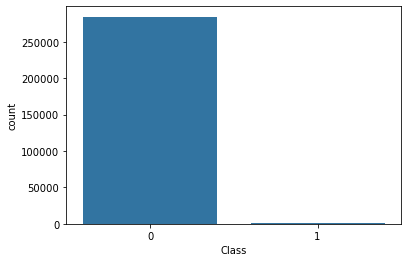

In [55]:
sns.countplot(x='Class', data=df)

In [67]:
x = df.drop(columns='Class')
y = df['Class']
y_0 = y[y == 0]
y_1 = y[y == 1]

In [69]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 284315, 1: 492})


In [74]:
scaler = MinMaxScaler(feature_range=(-1,1))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)
features = X_train.columns
print(features)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=features)
X_train

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.636520,0.947550,0.531116,0.688723,-0.371137,0.527543,-0.472776,-0.467924,0.572626,-0.074793,...,0.177469,0.123818,-0.045579,0.234053,-0.172880,0.142886,-0.264595,-0.166336,-0.372701,-0.991325
1,-0.196868,0.954303,0.535823,0.695634,-0.411576,0.525919,-0.478680,-0.471111,0.572183,-0.075354,...,0.176065,0.118499,-0.105235,0.239665,-0.247930,0.108099,-0.353080,-0.166134,-0.372605,-0.996214
2,0.696709,0.979511,0.518900,0.679638,-0.468399,0.515347,-0.478975,-0.481235,0.574895,0.009501,...,0.173948,0.126413,-0.019208,0.248748,-0.213763,-0.011107,-0.000669,-0.167996,-0.375445,-0.996275
3,0.753390,0.922384,0.549851,0.651251,-0.510900,0.547732,-0.504528,-0.451226,0.559455,-0.105891,...,0.176068,0.131927,0.046120,0.231856,-0.223954,0.069145,-0.190091,-0.163721,-0.369991,-0.998494
4,0.749698,0.905215,0.541298,0.695808,-0.660696,0.544807,-0.465560,-0.462612,0.575694,-0.067377,...,0.174427,0.118905,-0.099416,0.243890,-0.322729,-0.054354,-0.177954,-0.162202,-0.365264,-0.997517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,0.699278,0.994472,0.526814,0.578153,-0.551379,0.540619,-0.498538,-0.461299,0.555921,-0.157358,...,0.165672,0.118090,-0.029118,0.230501,-0.482455,0.154036,0.202828,-0.171484,-0.377698,-0.997672
227841,0.824806,0.889477,0.548056,0.672947,-0.587933,0.545649,-0.452307,-0.464356,0.587302,-0.095785,...,0.171470,0.136628,0.089489,0.229693,-0.594842,0.062726,-0.041063,-0.165050,-0.371659,-0.998054
227842,0.057173,0.888817,0.569957,0.632806,-0.525147,0.537007,-0.490671,-0.467885,0.585895,0.005533,...,0.174502,0.108427,-0.164475,0.245106,-0.157329,0.031638,-0.117835,-0.164959,-0.374111,-0.999262
227843,-0.608371,0.906984,0.553713,0.753845,-0.406376,0.526874,-0.478547,-0.467576,0.571147,-0.101471,...,0.179350,0.131046,0.033772,0.235770,-0.121074,0.004070,-0.270931,-0.158406,-0.366133,-0.999689


In [70]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(x, y)

In [75]:
print('new dataset shape %s' % Counter(y_res))

new dataset shape Counter({0: 492, 1: 492})


In [76]:
model = LogisticRegression()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.91      0.49      0.63       101

    accuracy                           1.00     56962
   macro avg       0.95      0.74      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [77]:
np.sum(y_pred == y_test) / len(y_test)

0.9989993328885924

In [93]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_res,y_res)
y_pred = kmeans.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

/home/ali/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/home/ali/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ali/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ali/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
np.sum(y_pred == y_test) / len(y_test)

0.9982268881008391